# Análise de livros do dataset da GoodReads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

books = pd.read_csv("data/Books.csv")

books.head()

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,16/9/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,1/9/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,1/11/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,1/5/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,13/9/2004,Scholastic


## Existe uma relação entre o número de páginas de um livro e a sua nota ou número de avaliações?

In [2]:
def get_columns_correlation(dataframe, columns, correlation, methods):
    filtered_df = dataframe[columns]
    row = [correlation]

    for method in methods:
        correlation_matrix = filtered_df.corr(method=method)
        correlation = correlation_matrix.values[0, 1]
        row.append(correlation)

    # Correlação média entre todos os métodos
    average = sum(row[1:]) / len(methods)
    row.append(average)

    return row


correlation_methods = ['pearson', 'kendall', 'spearman']

data = list()

row = get_columns_correlation(books, 
                              ["numero_paginas", "nota_media"], 
                              "Número de páginas vs Nota média",
                              correlation_methods)

data.append(row)

row = get_columns_correlation(books, 
                              ["numero_paginas", "avaliacoes_contagem"], 
                              "Número de páginas vs Número de avaliações",
                              correlation_methods)

data.append(row)

columns = ['Correlação']
columns.extend([method.title() for method in correlation_methods])
columns.append('Média')

correlations = pd.DataFrame(data=data, columns=columns)

correlations

,Correlação,Pearson,Kendall,Spearman,Média
0,Número de páginas vs Nota média,0.150938,0.065941,0.110086,0.108988
1,Número de páginas vs Número de avaliações,0.034316,0.124091,0.185087,0.114498


,Número de páginas,Número Médio de avaliações,Nota Média
0,De 0 à 100,4602.259903,3.940908
1,De 100 à 200,13028.670777,3.910756
2,De 200 à 300,16539.859498,3.886635
3,De 300 à 400,21420.213229,3.896927
4,De 400 à 500,23410.530479,3.961277
5,De 500 à 600,26633.307463,3.993970
6,De 600 à 700,20832.973822,4.047775
7,De 700 à 800,21797.082353,4.055961
8,De 800 à 900,33207.111111,4.091250
9,De 900 à 1000,22109.220779,4.107532


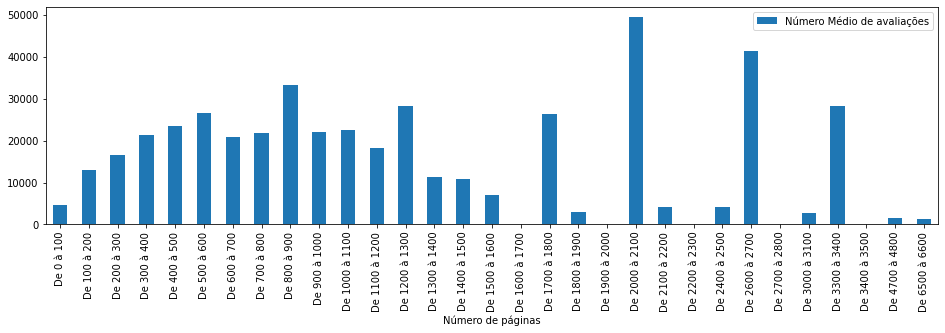

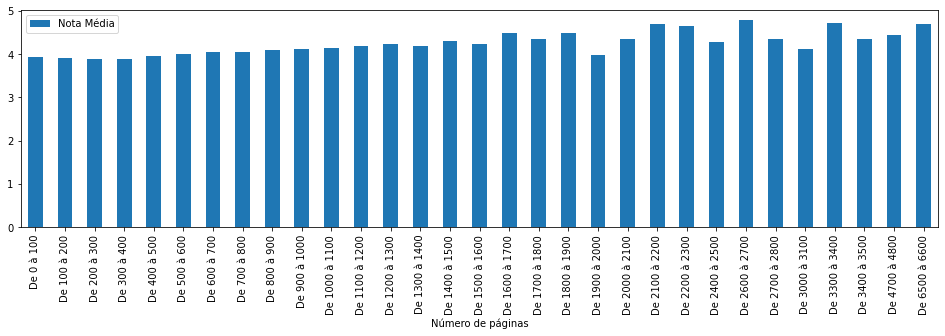

In [3]:
# Separa número de páginas em intervalos de 100 páginas
pages_range_list = list()
pages_range_order = list()

for pages in books['numero_paginas']:
    pages_range = (int(pages) // 100) * 100

    # Guarda valores inteiros para preservar a ordem
    pages_range_order.append(pages_range)
    pages_range_list.append(f"De {pages_range} à {pages_range + 100}")

books_pages_range = books.copy()
books_pages_range = books_pages_range.assign(paginas_intervalo = pages_range_list)
books_pages_range = books_pages_range.assign(paginas_ordem = pages_range_order)

# Número de páginas X Número de avaliações
books_pages_range_ratings = books_pages_range[["paginas_intervalo", "paginas_ordem","avaliacoes_contagem"]]

average_pages_range_ratings = books_pages_range_ratings.groupby(["paginas_intervalo", "paginas_ordem"]).mean()

average_pages_range_ratings = average_pages_range_ratings.sort_values('paginas_ordem')

# Número de páginas X Nota Média
books_pages_range_grade = books_pages_range[["paginas_intervalo", "paginas_ordem","nota_media"]]

average_pages_range_grade = books_pages_range_grade.groupby(["paginas_intervalo", "paginas_ordem"]).mean()

result = pd.merge(average_pages_range_ratings,
                  average_pages_range_grade, 
                  on='paginas_intervalo',
                  how='left')

result.reset_index(inplace=True)

result = result[["paginas_intervalo", "avaliacoes_contagem", "nota_media"]]
result = result.rename(columns={
    "paginas_intervalo": "Número de páginas",
    "avaliacoes_contagem": "Número Médio de avaliações",
    "nota_media": "Nota Média"
})

result.plot.bar(x='Número de páginas', y='Número Médio de avaliações', figsize=(16, 4))
result.plot.bar(x='Número de páginas', y='Nota Média', figsize=(16.45, 4))
result

Para obter uma reposta a essa pergunta, foi calculada a correlação entre o número de páginas, sua nota média, e seu número de avaliações através de 3 métodos diferentes: Pearson, Kendall, Spearman. Assim, foi observado que a correlação média entre número de páginas e nota média é de 0,1089, e a correlação média entre número de páginas e número de avaliações é de 0,1144. Com isso, é possível observar que não há uma correlação significante entre as features avaliadas. Em seguida foram calculados também o número médio de avaliações e as notas médias para cada intervalo de 100 páginas. Com esses dados é possível perceber uma tendência de crescimento no número de avaliações de 100 à 600 páginas, decaíndo por volta das 1000 páginas. A partir das 1600 páginas, a distribuição se torna mais inconsistente e apresenta comportamentos pouco previsíveis, possivelmente em razão do baixo número de obras com essas quantidades de páginas. Já para a nota média, os resultados se mantêm consistentes com pouca relação ao número de páginas, girando em torno da nota 4.

## Quais os autores e autoras mais lidos? E os mais bem avaliados?

In [4]:
# Separa autores no formato Autor1/Autor2
exploded_authors = books.copy()
formatted_authors = list()

for authors in exploded_authors["autores"]:
    author_list = [author for author in authors.split('/')]

    formatted_authors.append(author_list)

exploded_authors["autores"] = formatted_authors
exploded_authors = exploded_authors.explode("autores")

# Mais lidos
authors_count_rating = exploded_authors[["autores", "avaliacoes_contagem"]]
average_author_count_rating = authors_count_rating.groupby("autores").sum()
most_ratings_authors = average_author_count_rating.sort_values('avaliacoes_contagem', ascending=False)

# Melhor avaliado
authors_ratings = exploded_authors[["autores", "nota_media"]]
average_author_rating = authors_ratings.groupby("autores").mean()

ratings_authors_count = pd.merge(average_author_rating, 
                                 average_author_count_rating, 
                                 on='autores',
                                 how='right')
                                    
best_ratings_authors = ratings_authors_count.sort_values(
    ['nota_media', 'avaliacoes_contagem'], ascending=[False, False]
)

data = np.column_stack((list(most_ratings_authors.index),
                        list(best_ratings_authors.index)))
columns = ["Autores mais lidos", "Autores melhor avaliados"]

result = pd.DataFrame(data=data, 
                      columns=columns)
result

,Autores mais lidos,Autores melhor avaliados
0,J.K. Rowling,John Diamond
1,Mary GrandPré,Elena N. Mahlow
2,J.R.R. Tolkien,Alisa Klayman-Grodsky
3,Stephenie Meyer,Dennis Adler
4,Stephen King,Eric Weiner
...,...,...
9232,John Biguenet,Rick Osborne
9233,Annette Meyers,Robert A. Weiss
9234,James Beckett III,Strawberry Saroyan
9235,David Edgerley Gates,United Feature Syndication


Como alguns autores estão presentes no dataset no formato Autor1/Autor2, foi realizada uma separação desses nomes para uma comparação mais justa. Para medir quem foram os autores e autoras mais lidos, foi considerado o número de avaliações que seus livros receberam, dado que livros mais lidos terão mais avaliações. Esse método parece adequado, visto que entre os autores mais lidos figuram nomes muito populares como J.K. Rowling, J.R.R. Tolkien, e Stephenie Meyer. Para medir quem são os autores e autoras mais bem avaliados, foi calculada a nota média entre todos os seus livros. Como alguns autores atingem a nota máxima de 5,0, os autores com as mesmas notas foram ordenandos de acordo com sua contagem de avaliações. Assim, tivemos como autores melhor avaliados John Diamond, Elena N. Mahlow e Alisa Klayman-Grodsky.

## Livros mais antigos têm menos avaliações do que livros mais novos?

,Década,Número médio de avaliações
0,1890,332.000000
1,1910,135.333333
2,1920,58.750000
3,1930,9.500000
4,1940,994.000000
5,1950,9978.689655
6,1960,1202.821918
7,1970,1565.323529
8,1980,8128.090764
9,1990,12213.297330


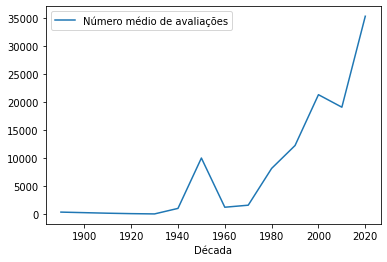

In [5]:
# Obtem década a partir da data de publicação
decades_list = list()

for date in books['publicacao_data']:
    # Pega o ano e substitui o último digito por 0
    decade = date[-4:-1] + '0'

    decades_list.append(decade)

books_decade = books.copy()
books_decade = books_decade.assign(decada = decades_list)
books_decade_ratings = books_decade[["decada", "avaliacoes_contagem"]]

average_decade_rating = books_decade_ratings.groupby("decada").mean()

columns = ["Década", "Número médio de avaliações"]

data = np.column_stack((list(average_decade_rating.index),
                        average_decade_rating.values.flatten()))

result = pd.DataFrame(data=data, 
                      columns=columns)
result = result.apply(pd.to_numeric)

result.plot.line(x='Década', y='Número médio de avaliações')
result

In [6]:
books_decade.loc[books_decade['decada'] == "2020"]

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora,decada
9668,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,360,35275,1370,31/3/2020,Avon,2020


Para responder essa pergunta, os livros foram classificados de acordo com sua década de publicação. Ao calcular o número médio de avaliações, é possível observar que, no geral, esse valor apresentou uma tendência de crescimento com o passar dos anos. Esse resultado é esperado, visto que a GoodReads foi fundada em 2006, favorecendo que livros mais recentes sejam mais avaliados na plataforma. Curiosamente, há apenas um livro presente no dataset para a década de 2020, que é a que possui mais avaliações. Algumas décadas apresentam poucas obras publicadas no dataset, o que pode comprometer a validade da comparação.

## Quais os idiomas com mais livros avaliados?

In [7]:
# Agrupa livros em inglês em uma só categoria
languages_list = list()

for lang in books['lingua_codigo']:
    if "en" in lang:
        languages_list.append("eng")
    else:
        languages_list.append(lang)    

books_language = books.copy()
books_language = books_decade.assign(linguagem = languages_list)
books_language_ratings = books_language[["linguagem", "avaliacoes_contagem"]]

total_language_rating = books_language_ratings.groupby("linguagem").sum()
average_language_rating = books_language_ratings.groupby("linguagem").mean()

language_ratings = pd.merge(total_language_rating, 
                            average_language_rating, 
                            on='linguagem',
                            how='right')

most_ratings_language = language_ratings.sort_values(
    'avaliacoes_contagem_x', ascending=False
)

columns = ["Idioma", "Total de avaliações", "Número médio de avaliações"]

data = np.column_stack((list(most_ratings_language.index),
                        most_ratings_language["avaliacoes_contagem_x"],
                        most_ratings_language["avaliacoes_contagem_y"]))

result = pd.DataFrame(data=data, 
                      columns=columns)
result

,Idioma,Total de avaliações,Número médio de avaliações
0,eng,198013434,18779.72628983308
1,spa,1010673,4636.114678899083
2,fre,471934,3277.3194444444443
3,ger,23238,234.72727272727272
4,ita,16172,3234.4
5,rus,8954,4477.0
6,mul,7346,386.63157894736844
7,swe,5342,2671.0
8,jpn,3142,68.30434782608695
9,por,1651,165.1


Como alguns livros apresentavam diferentes códigos de linguagem para o idioma inglês, os dados foram padronizados para obter resultados mais consistentes. Então, foram calculados o total de avaliações presentes em cada idioma, e também seu número médio de avaliações. O inglês apresentou os maiores valores em ambas as métricas. Esse resultado é esperado, visto que GoodReads é um site americano, e possui uma maior base de usuários em países anglófonos. Além disso, é possível observar que muitos idiomas possuem apenas uma obra no conjunto de dados, visto que seu número médio de avaliações é igual ao total de avaliações.

## Quais outros insights você consegue obter a partir deste dataset?

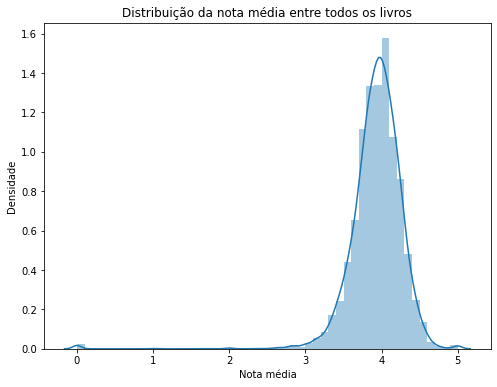

In [8]:
rating_distribution = books["nota_media"]
rating_distribution = pd.to_numeric(rating_distribution)

plt.figure(figsize=(8, 6))

sns.distplot(rating_distribution)

plt.title('Distribuição da nota média entre todos os livros',)
plt.xlabel('Nota média')
plt.ylabel('Densidade')
plt.show()

__As notas médias dos livros apresentam uma distribuição normal com valor médio 4__ 

Um insight obtido nesse conjunto de dados é que as notas médias dos livros giram em torno do valor 4, apresentando também uma baixa variância. Acredito que essa distribuição ocorra em razão de livros serem uma mídia mais trabalhosa para se consumir. Se um leitor teve o investimento de tempo de ler um livro, e ainda avaliá-lo, espera-se que esse livro tenha sido uma boa experiência. Caso o leitor não tenha uma boa impressão do livro, é mais provável que não termine de ler, e não deixe uma avaliação. 

,Década,Número médio de páginas
0,1890,144.000000
1,1910,442.666667
2,1920,430.250000
3,1930,252.000000
4,1940,178.000000
5,1950,279.344828
6,1960,295.794521
7,1970,315.225490
8,1980,363.181529
9,1990,347.333333


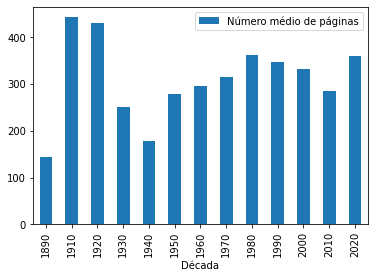

In [9]:
# Variável books_decade contém o Dataframe com informação da década
pages_decade_ratings = books_decade[["decada", "numero_paginas"]]

average_decade_pages = pages_decade_ratings.groupby("decada").mean()

columns = ["Década", "Número médio de páginas"]

data = np.column_stack((list(average_decade_pages.index),
                        average_decade_pages.values.flatten()))

result = pd.DataFrame(data=data, 
                      columns=columns)
result = result.apply(pd.to_numeric)

result.plot.bar(x='Década', y='Número médio de páginas')
result

In [10]:
books_decade.loc[books_decade['decada'] == "1930"]

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora,decada
3365,12292,Murder from the East,Carroll John Daly,3.63,eng,312,15,4,1/1/1935,International Polygonics,1930
10188,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,eng,192,4,0,1/12/1931,Trafalgar Square Publishing,1930


In [11]:
books_decade.loc[books_decade['decada'] == "1940"]

,bookID,titulo,autores,nota_media,lingua_codigo,numero_paginas,avaliacoes_contagem,revisoes_contagem,publicacao_data,editora,decada
2165,7777,McElligot's Pool,Dr. Seuss,4.06,eng,64,4560,253,12/9/1947,Random House Books for Young Readers,1940
2208,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,eng,180,70,7,1/1/1943,Thomas Y. Crowell Company,1940
5726,21342,Math Fables,Greg Tang/Heather Cahoon,4.03,eng,40,0,0,1/1/1949,Scholastic Inc.,1940
7458,28657,Seven Types of Ambiguity,William Empson,3.85,eng,272,7,0,1/12/1949,Chatto and Windus,1940
7957,30488,The Communist Manifesto,Karl Marx/Friedrich Engels/Samuel Moore,3.55,eng,48,733,55,1/6/1948,International Publishers (NYC),1940
9713,38752,Death of a Salesman,Arthur Miller,3.51,eng,139,1223,104,18/5/1949,Viking Books,1940
10435,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,eng,503,365,33,1/1/1940,P. F. Collier and Sons,1940


__Livros publicados nas décadas de 1930 e 1940 tem o menor número médio de páginas__

Um outro insight observado no dataset é como as décadas de 1930 e 1940 apresentam o menor número médio de páginas entre todas as décadas. A um primeiro momento, esse resultado pode ser atribuído ao período de pós-depressão e da Segunda Guerra Mundial. Porém, essa análise não parece adequada, visto que a década de 1910, em que ocorreu a Primeira Guerra Mundial, é a que apresenta o maior número médio de páginas. Em uma investigação mais profunda, foi possível observar que há apenas 2 livros no dataset para a década de 1930, e 7 livros para a década de 1940 (sendo um deles O Manifesto Comunista, descrito erroneamente como publicado em 1948, 100 anos após sua publicação). O baixo número de obras presentes no dataset para essas décadas dificulta que seja feita uma análise conclusiva.

,Autor,Nota média,Livros publicados
8211,Stephen King,4.008686868686869,99.0
9110,William Shakespeare,3.932258064516129,93.0
1189,Charles Bukowski,4.0344444444444445,9.0
4763,Karl Marx,3.5944444444444446,9.0
5550,Margaret Atwood,3.938888888888889,9.0
...,...,...,...
3608,Jackie Cassada,3.36,1.0
3606,Jack Weatherford,4.11,1.0
3603,Jack Nimersheim,3.62,1.0
3602,Jack Meadows,3.8,1.0


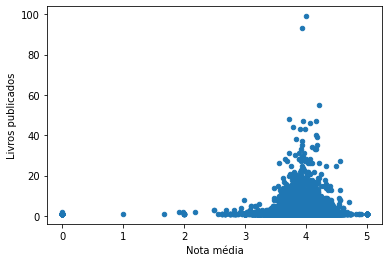

In [12]:
# Quantos livros foram publicados pelo autor
authors_book_count = authors_ratings.groupby("autores").count()

# Faz merge com a nota média do autor
ratings_authors_count = pd.merge(average_author_rating, 
                                 authors_book_count, 
                                 on='autores',
                                 how='right')
ratings_authors_count.columns = ["Nota média", "Livros publicados"]

ratings_authors_count.plot.scatter(x='Nota média', y='Livros publicados')

data = np.column_stack((list(ratings_authors_count.index),
                        ratings_authors_count.values))
                                    
columns = ["Autor", "Nota média", "Livros publicados"]

result = pd.DataFrame(data=data, 
                      columns=columns)

result = result.sort_values(by="Livros publicados", ascending=False)

result

,Livros publicados
Nota média,
0,1.027027
1,1.500000
2,1.437500
3,2.111836
4,2.073153
5,1.000000


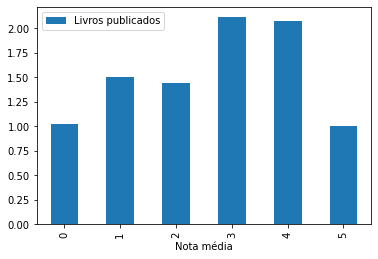

In [13]:
from math import floor

floor_ratings = ratings_authors_count[["Nota média", "Livros publicados"]]
floor_ratings["Nota média"] = floor_ratings["Nota média"].apply(floor)

floor_ratings_mean_books = floor_ratings.groupby("Nota média").mean()

floor_ratings_mean_books.plot.bar()
floor_ratings_mean_books

In [14]:
floor_ratings_authors = pd.merge(floor_ratings, 
                            average_author_count_rating, 
                            on='autores',
                            how='right')

floor_ratings_authors.reset_index(inplace=True)

floor_ratings_authors = floor_ratings_authors.rename(
    columns={"avaliacoes_contagem": "Número de avaliações",
             "autores": "Autor"},
)

floor_ratings_authors.loc[floor_ratings_authors["Nota média"] == 5]

,Autor,Nota média,Livros publicados,Número de avaliações
219,Alisa Klayman-Grodsky,5,1,2
1278,Chris Green,5,1,1
1327,Chris Wright,5,1,1
1862,David Sylvester,5,1,1
1953,Dennis Adler,5,1,2
2340,Elena N. Mahlow,5,1,4
2487,Eric Weiner,5,1,2
2610,F.W. Hall,5,1,0
3427,Ian Martin,5,1,1
3689,James E. Campbell,5,1,0


__Autores com mais livros publicados tendem a ter melhores notas__

Foi possível observar nesse conjunto de dados que autores com mais publicações tendem a ter melhores notas. Enquanto autores com uma nota entre 0 e 2 costumam ter por volta de 1,5 publicações, autores com notas entre 3 e 4 costumam ter em média mais de 2 publicações. Uma possível explicação para esse resultado é que autores melhor avaliados recebem incentivo para escrever mais livros. Curiosamente, todos os autores com nota 5 possuem apenas um livro publicado, ainda que o baixo número de avaliações afete a confiabilidade dessa nota (alguns possuindo até mesmo 0 avaliações). Esse resultado também pode ser influenciado pela presença de duplicatas de certos livros dentro do dataset.